In [0]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

In [0]:
# reading the labelled kaggle data
data_path = '/content/drive/My Drive/BT4222/Data/kaggle_labeled.csv'

data = pd.read_csv(data_path)
data.shape

(590504, 9)

In [0]:
#Display some of the data 
data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,response_ability_label,tweet_from_company
0,1881362,561461,True,Tue Oct 17 17:29:44 +0000 2017,@118424 The speed of your DATA can be compared...,1881361,1881363.0,1,0
1,740989,297215,True,Wed Oct 11 13:58:30 +0000 2017,@AppleSupport 11,740991,740988.0,1,0
2,621080,267405,True,Wed Nov 22 15:50:26 +0000 2017,@GloCare Please could you help me with any app...,"621079,621081",621082.0,1,0
3,2235058,141913,True,Sat Nov 11 08:21:51 +0000 2017,@Safaricom_Care DM (1),2235060,2235057.0,1,0
4,2163052,390852,True,Thu Nov 09 07:48:00 +0000 2017,"@LondonMidland hello, long queue at Worcester ...",2163051,NaN,1,0


In [0]:
#import packages
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [0]:
#import packages
import nltk.stem
import nltk.corpus
import nltk.tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re


from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
#download packages
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

KeyboardInterrupt: ignored

In [0]:
#create new dataframe to analyse 
df = data.copy()

In [0]:
#Keep only the text and the label columns 
df.drop(['tweet_id', 'inbound', 'author_id', 'created_at', 'response_tweet_id', 'in_response_to_tweet_id', 'tweet_from_company'], axis=1, inplace=True)


In [0]:
#Check that it's done
df.columns

Index(['text', 'response_ability_label'], dtype='object')

In [0]:
#Preprocessing - (1) Remove URLs (2) Tokenise (3) Lemmatize 
lemmatizer = WordNetLemmatizer() 
stop_words = set(stopwords.words('english')) 

def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)


preprocessed=[]
for i in df.text: 
  i=remove_urls(i)
  word_tokens = word_tokenize(i)
  filtered_sentence = [lemmatizer.lemmatize(w) for w in word_tokens if not w in stop_words] 
  preprocessed.append(str(filtered_sentence).translate(str.maketrans('', '', string.punctuation)))

In [0]:
# Create new column
df['CleanestText']=preprocessed

In [0]:
# splitting into training and validation set
X_train, X_val, y_train, y_val = train_test_split(df.CleanestText, df.response_ability_label, test_size=0.2, random_state=2)

In [0]:
#Import from different libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(X_train, y_train, X_test, y_test, vect):
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # use Multinomial Naive Bayes to predict the star rating
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    # Get the training accuracy
    print('Training Accuracy: ', metrics.accuracy_score(y_train, nb.predict(X_train_dtm)))
    # print the accuracy of its predictions
    print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [0]:
#NOT USED as it does not improve accuracy
#import libraries
import spacy
from html import unescape

#lemmatize all the words
spacy.load('en')
lemmatizer = spacy.lang.en.English()

def my_tokenizer(doc):
    tokens = lemmatizer(doc)
    return([token.lemma_ for token in tokens])

# remove html entities from docs and set everything to lowercase
def my_preprocessor(doc):
    return(unescape(doc).lower())

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

# ignore terms that appear in less than 20 of documents
# Take ngrams of 1 and 2 words
vect = CountVectorizer(min_df=20,ngram_range=(1,2))
tokenize_test(X_train, y_train, X_val, y_val, vect)

Features:  36479
Training Accuracy:  0.7350524869655781
Test Accuracy:  0.7219244544923413


In [0]:
# fit and/or transforming to training set

# fit and transform X_train
X_train_dtm = vect.fit_transform(X_train)

X_val_dtm = vect.transform(X_val)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Create first pipeline for base without reducing features.

# pipe = Pipeline([('classifier', RandomForestClassifier())])
pipe = Pipeline([('classifier' , RandomForestClassifier())])

# Create param grid of Logistic Regression.
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train_dtm, y_train)

In [0]:
#Get parameters of best logistic regression classifier
best_clf.best_estimator_.get_params()['classifier']

LogisticRegression(C=0.03359818286283781, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Return Model Accuracy
print('Model accuracy is',best_clf.score(X_val_dtm, y_val))

Model accuracy is 0.7405187085630096


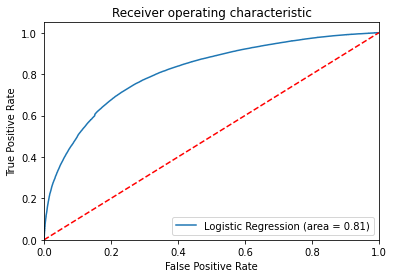

In [0]:
#Draw Graph of the Log ROC 
probs = best_clf.predict_proba(X_val_dtm)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [0]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.03359818286283781, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train_dtm, y_train)
score = logreg.score(X_val_dtm, y_val)

print("Training Accuracy: ", logreg.score(X_train_dtm, y_train))
print("Validation Accuracy:", score)

Training Accuracy:  0.7545506696612849
Validation Accuracy: 0.7405187085630096


In [0]:
Prediction2 = vect.transform(df.CleanestText)

#Make Prediction on new data
lr1_prediction = logreg.predict(Prediction2)

In [0]:
from sklearn.metrics import confusion_matrix

#Create confusion matrix based on prediction compared to the actual truth 
confusion_matrix(lr1_prediction, df.response_ability_label, labels=None, sample_weight=None, normalize='all')

array([[0.37552498, 0.1237807 ],
       [0.12447502, 0.3762193 ]])

In [0]:
# reading the labelled Tweets
data_path2 = '/content/drive/My Drive/BT4222/Data/cust_tweets.csv'

twitterdata = pd.read_csv(data_path2)
twitterdata.shape

(7643, 8)

In [0]:
twitterdata.head()

,Unnamed: 0,tweet_id,authod_id,inbound,created_at,text,in_response_to_tweet_id,customers_of
0,0,1249193154512916480,375541562,False,2020-04-12 04:30:31,@Jetstar_Asia Please check your DM. Thanks @Je...,1.249190e+18,JetStar Asia
1,1,1249189062759665667,375541562,False,2020-04-12 04:14:16,@Jetstar_Asia Pleas help me. I have also tried...,1.249186e+18,JetStar Asia
2,2,1249040470401060864,1024338385404682246,True,2020-04-11 18:23:48,RT @monilsj: Hi @Jetstar_Asia! I have noticed ...,NaN,JetStar Asia
3,3,1249038696214458369,286610770,True,2020-04-11 18:16:45,Hi @Jetstar_Asia! I have noticed that Air Asia...,NaN,JetStar Asia
4,4,1248566696798867456,1048797604019036160,True,2020-04-10 11:01:12,RT @RayMSLim: @Jetstar_Asia why do you make it...,NaN,JetStar Asia


In [0]:
#Preprocessing - (1) Remove URLs (2) Tokenise (3) Lemmatize 
lemmatizer = WordNetLemmatizer() 
stop_words = set(stopwords.words('english')) 

def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)


preprocessed=[]
for i in twitterdata.text: 
  i=remove_urls(i)
  word_tokens = word_tokenize(i)
  filtered_sentence = [lemmatizer.lemmatize(w) for w in word_tokens if not w in stop_words] 
  preprocessed.append(str(filtered_sentence).translate(str.maketrans('', '', string.punctuation)))

In [0]:
# Create new column
twitterdata['CleanestText']=preprocessed

In [0]:
#Create prediction text
PredictText=twitterdata['CleanestText']

In [0]:
#Transform the text for processing
Prediction = vect.transform(PredictText)

#Make Prediction on new data
lr_prediction = logreg.predict(Prediction)

In [0]:
#Combine Prediction with text
lr_results = np.array(list(zip(twitterdata.text,lr_prediction)))
#Add Column Labels
lr_results = pd.DataFrame(lr_results, columns=['tweet', 'Outcome'])
#Export to csv
lr_results.to_csv('lr_vectorized.csv', index = False)

In [0]:
lr_results.head()

,tweet,Outcome
0,@Jetstar_Asia Please check your DM. Thanks @Je...,0
1,@Jetstar_Asia Pleas help me. I have also tried...,0
2,RT @monilsj: Hi @Jetstar_Asia! I have noticed ...,1
3,Hi @Jetstar_Asia! I have noticed that Air Asia...,1
4,RT @RayMSLim: @Jetstar_Asia why do you make it...,1


In [0]:
#View the outcomes of whether actionable or not
lr_results.groupby('Outcome').count()

,tweet
Outcome,
0,2461
1,5182
